# LABORATORY SESSION - WEEK 3 

### Exercise 1 

Draw an histogram with marked sigma intervalls for random vavriables from the normal distribution.

### Solution 

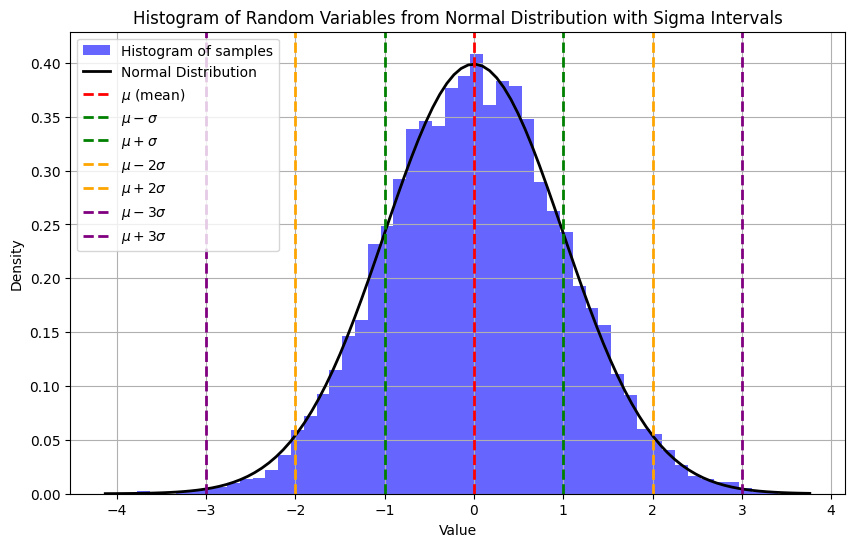

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random variables from a normal distribution
mu, sigma = 0, 1  # mean and standard deviation
data = np.random.normal(mu, sigma, 10000)

# Create the histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, 50, density=True, alpha=0.6, color='b', label='Histogram of samples')

# Overlay the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) 
pdf = stats.norm.pdf(x, mu, sigma) 
plt.plot(x, pdf, 'k', linewidth=2, label='Normal Distribution')

# Mark standard deviation intervals (sigma intervals)
plt.axvline(mu, color='r', linestyle='--', linewidth=2, label=r'$\mu$ (mean)')
plt.axvline(mu - sigma, color='g', linestyle='--', linewidth=2, label=r'$\mu - \sigma$')
plt.axvline(mu + sigma, color='g', linestyle='--', linewidth=2, label=r'$\mu + \sigma$')
plt.axvline(mu - 2*sigma, color='orange', linestyle='--', linewidth=2, label=r'$\mu - 2\sigma$')
plt.axvline(mu + 2*sigma, color='orange', linestyle='--', linewidth=2, label=r'$\mu + 2\sigma$')
plt.axvline(mu - 3*sigma, color='purple', linestyle='--', linewidth=2, label=r'$\mu - 3\sigma$')
plt.axvline(mu + 3*sigma, color='purple', linestyle='--', linewidth=2, label=r'$\mu + 3\sigma$')

# Add labels and legend
plt.title('Histogram of Random Variables from Normal Distribution with Sigma Intervals')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 2

Check the Pareto rules for variables from geometric distribution.

### Solution 

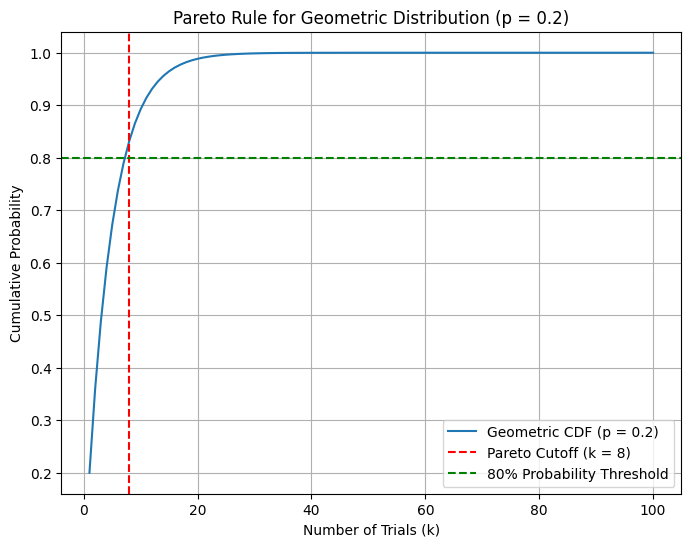

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for geometric distribution
p = 0.2  # probability of success --> 0.8 is the probability of failure

# Geometric distribution CDF
def geometric_pmf(k, p):
    return p * (1 - p)**(k  - 1)

# Total number of trials to consider
k_values = np.arange(1, 101)

# Compute PMF for these values
pmf_values = geometric_pmf(k_values, p)

# Compute CDF for these values 
cdf_values = np.cumsum(pmf_values)

# Find the point where CDF exceeds 80% (Pareto threshold)
pareto_cutoff_index = np.where(cdf_values >= 0.8)[0][0] # index
pareto_cutoff_k = k_values[pareto_cutoff_index]         # values 

# Plotting the CDF
plt.figure(figsize=(8, 6))
plt.plot(k_values, cdf_values, label=f'Geometric CDF (p = {p})')
plt.axvline(pareto_cutoff_k, color='r', linestyle='--', label=f'Pareto Cutoff (k = {pareto_cutoff_k})')
plt.axhline(0.8, color='g', linestyle='--', label='80% Probability Threshold')
plt.xlabel('Number of Trials (k)')
plt.ylabel('Cumulative Probability')
plt.title('Pareto Rule for Geometric Distribution (p = 0.2)')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 3

Draw an histogram with marked sigma intervalls for random vavriables from a continuous power distribution.

### solution 

[]

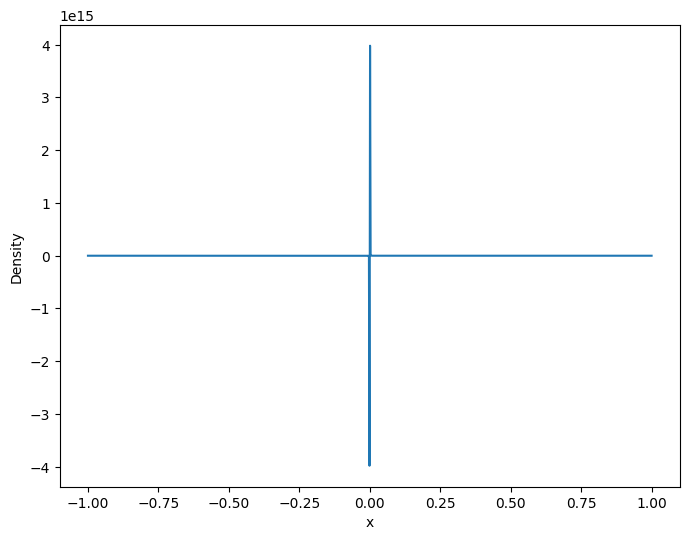

In [7]:
# power degree 
alpha = 5

# continuous power distribution
def f(x):
    min_x = np.min(x)
    return ((alpha - 1) / min_x) * ((x / min_x) ** (-alpha))

x = np.linspace(-1, 1, 1000)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Power Distribution (alpha = {alpha})')
plt.xlabel('x')
plt.ylabel('Density')
plt.plot()

### Exercise 4 

Check the Pareto rules for variables from zeta distribution.

### Solution 

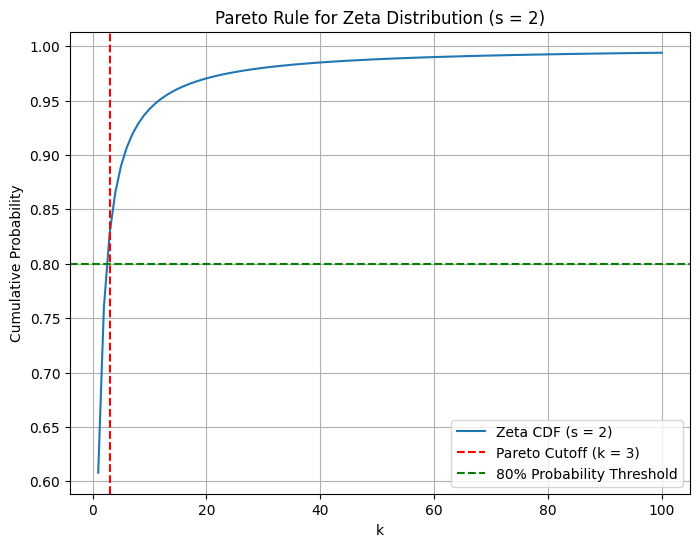

In [8]:
from scipy.special import zeta
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Zeta distribution
s = 2  # shape parameter (typical for Zipf-like distributions)
k_values = np.arange(1, 101)  # range of values

# PMF of the Zeta distribution
pmf_zeta = 1 / (k_values ** s * zeta(s))

# CDF of the Zeta distribution
cdf_zeta = np.cumsum(pmf_zeta)

# Find the Pareto cutoff where the cumulative sum exceeds 80%
pareto_cutoff_index = np.where(cdf_zeta >= 0.8)[0][0]
pareto_cutoff_k = k_values[pareto_cutoff_index]

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(k_values, cdf_zeta, label=f'Zeta CDF (s = {s})')
plt.axvline(pareto_cutoff_k, color='r', linestyle='--', label=f'Pareto Cutoff (k = {pareto_cutoff_k})')
plt.axhline(0.8, color='g', linestyle='--', label='80% Probability Threshold')
plt.xlabel('k')
plt.ylabel('Cumulative Probability')
plt.title('Pareto Rule for Zeta Distribution (s = 2)')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 5

1. Draw BA network and ER graph using built-in functions.

2. Observe the presence of hubs.

3. Draw a vertex degree histogram.

4. Compute estimators of expectation and variance for vertex degrees.

5. How are the two cases different?

### Solution

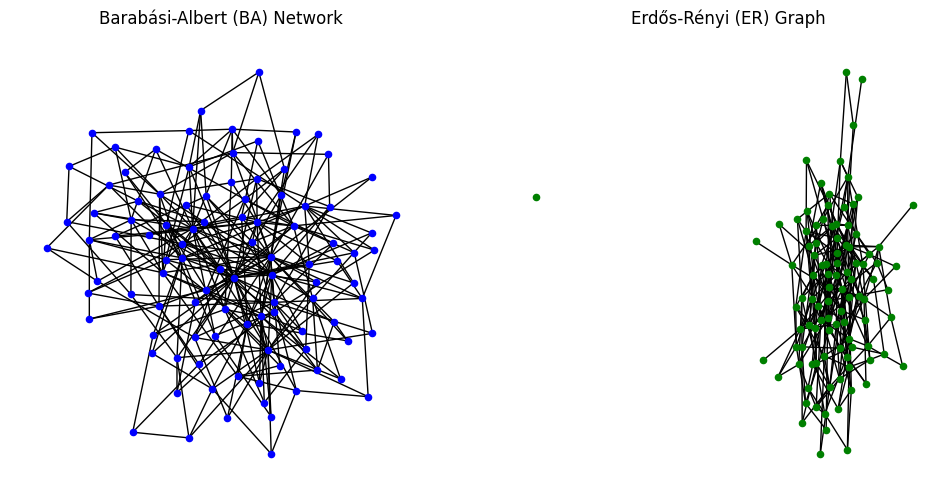

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate Barabási-Albert (BA) Network
n_ba = 100  # number of nodes
m_ba = 3    # number of edges to attach from a new node to existing nodes
ba_graph = nx.barabasi_albert_graph(n_ba, m_ba)

# Generate Erdős-Rényi (ER) Graph
n_er = 100  # number of nodes
p_er = 0.05  # probability of edge creation
er_graph = nx.erdos_renyi_graph(n_er, p_er)

plt.figure(figsize=(12, 6))

# Plotting BA Network
plt.subplot(121)
nx.draw(ba_graph, node_size=20, node_color="blue", with_labels=False)
plt.title('Barabási-Albert (BA) Network')

# Plotting ER Graph
plt.subplot(122)
nx.draw(er_graph, node_size=20, node_color="green", with_labels=False)
plt.title('Erdős-Rényi (ER) Graph')

plt.show()

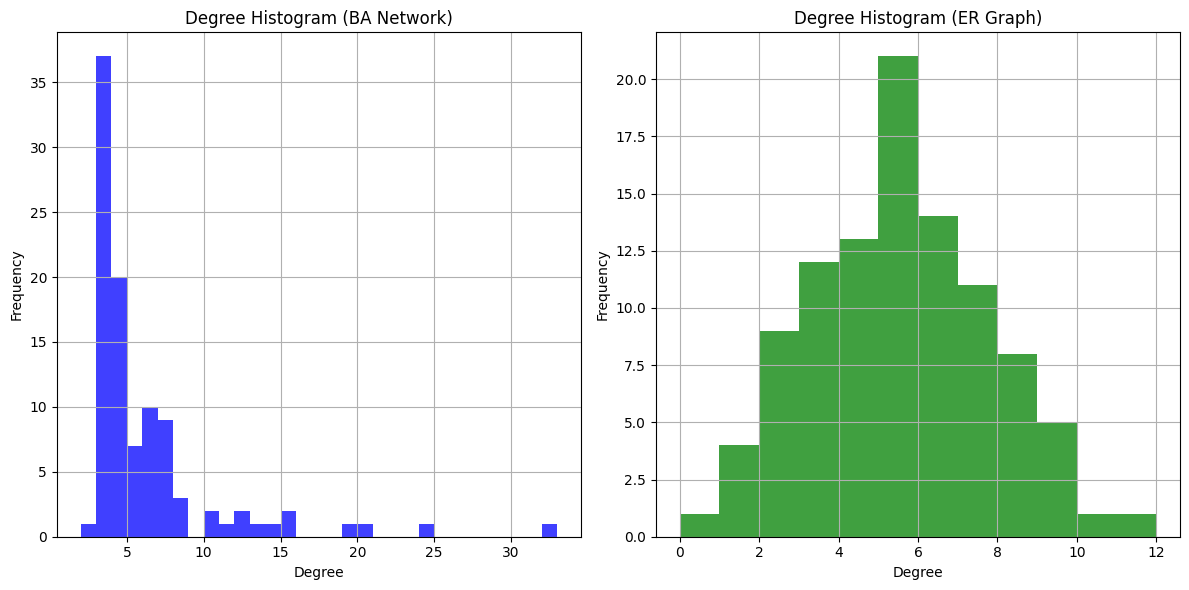

In [11]:
# Degree histogram for BA and ER graphs

# Function to plot degree histogram
def plot_degree_histogram(graph, title, color):
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), color=color, alpha=0.75)
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)

# Plot degree histograms for both graphs
plt.figure(figsize=(12, 6))

# Degree histogram for Barabási-Albert (BA) network
plt.subplot(121)
plot_degree_histogram(ba_graph, 'Degree Histogram (BA Network)', 'blue')

# Degree histogram for Erdős-Rényi (ER) graph
plt.subplot(122)
plot_degree_histogram(er_graph, 'Degree Histogram (ER Graph)', 'green')

plt.tight_layout()
plt.show()


In [12]:
import numpy as np

# Function to compute mean and variance of vertex degrees
def compute_degree_stats(graph):
    degrees = [graph.degree(n) for n in graph.nodes()]
    mean_degree = np.mean(degrees)
    variance_degree = np.var(degrees)
    return mean_degree, variance_degree

# Compute for BA Graph
mean_ba, variance_ba = compute_degree_stats(ba_graph)
print(f"Barabási-Albert (BA) Network:\nMean Degree: {mean_ba}\nVariance of Degree: {variance_ba}\n")

# Compute for ER Graph
mean_er, variance_er = compute_degree_stats(er_graph)
print(f"Erdős-Rényi (ER) Graph:\nMean Degree: {mean_er}\nVariance of Degree: {variance_er}")


Barabási-Albert (BA) Network:
Mean Degree: 5.82
Variance of Degree: 22.227600000000006

Erdős-Rényi (ER) Graph:
Mean Degree: 5.06
Variance of Degree: 5.0164
